# Daily Challenge - Statistics for Machine Learning

# Applying Inferential Statistics

### Here are the hypotheses to test:
1. Age of people who left the bank and who did not are similar. Alternative: Not similar.
2. Credit score of people who left the bank and who did not are similar. Alternative: Not similar.
3. Balance of people who left the bank and who did not are similar. Alternative: Not similar.
4. Estimated Salary of people who left the bank and who did not are similar. Alternative: Not similar.

#### The most appropriate test to analyse data here is Frequentist test.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import scipy.stats
from scipy.stats import t
from scipy.special import stdtr
from numpy.random import seed
import seaborn as sns

%matplotlib inline
from matplotlib import rcParams
sns.set_style("whitegrid")
sns.set_context("poster")

In [ ]:
matplotlib.rcParams['figure.figsize'] = (8.0, 5.0)

In [15]:
## TODO : load the csv file from this link : https://www.kaggle.com/code/vaibhagarwal/inferential-statistics/input
#there were issues with colab / kaggle, so I downloaded it.

from google.colab import files
uploaded = files.upload()

file_1 = pd.read_csv("Churn_Modelling.csv")


Saving Churn_Modelling.csv to Churn_Modelling (1).csv


In [19]:
## TODO : make into a dataframe called df
file_1 = "Churn_Modelling.csv"
df = pd.read_csv(file_1)


In [20]:
## TODO : output the first 5 lines
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [23]:
## TODO : Create two separate DataFrames, `df_0` and `df_1`, to filter customers who have not exited (0) and customers who have exited (1), respectively

df_0 = df[df['Exited'] == 0] #have not exited
df_1 = df[df['Exited'] == 1] #have exited

print(df_0.head())

print(df_1.head())

   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
1          2    15647311      Hill          608     Spain  Female   41   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   
6          7    15592531  Bartlett          822    France    Male   50   
8          9    15792365        He          501    France    Male   44   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
1       1   83807.86              1          0               1   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   
6       7       0.00              2          1               1   
8       4  142051.07              2          0               1   

   EstimatedSalary  Exited  
1        112542.58       0  
3         93826.63       0  
4         79084.10       0  
6         10062.80       0  
8         749

## Hypothesis 1: Age

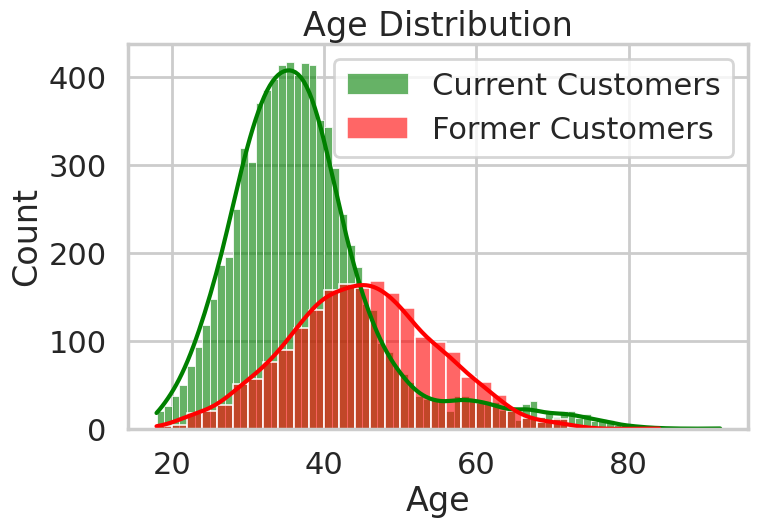

In [24]:
## TODO: Plot the age distribution for customers who stayed with the bank and those who left using seaborn, with different colors for each group and a legend.

sns.histplot(data=df_0, x='Age', kde=True, label='Current Customers', color='green', alpha=0.6)
sns.histplot(data=df_1, x='Age', kde=True, label = 'Former Customers', color='red', alpha=0.6)

plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend()
plt.show()

In [26]:
## TODO: Calculate the mean and standard deviation of the age for customers who stayed with the bank.

mean = df_0['Age'].mean()
standard = df_0['Age'].std()

print(f"The mean age for customers who stayed with the bank is {mean}.")
print(f"The standard age for customers who stayed with the bank is {standard}.")

The mean age for customers who stayed with the bank is 37.40838879819164.
The standard age for customers who stayed with the bank is 10.125362911047631.


In [27]:
## TODO: Calculate the mean and standard deviation of the age for customers who left the bank.

mean_1 = df_1['Age'].mean()
standard_1 = df_1['Age'].std()

print(f"The mean age for customers who left the bank is {mean_1}.")
print(f"The standard age for customers who left the bank is {standard_1}.")

The mean age for customers who left the bank is 44.8379970544919.
The standard age for customers who left the bank is 9.761561555507132.


In [28]:
## TODO: Perform a t-test to compare the ages of customers who stayed and left the bank.

t_test, p_value = scipy.stats.ttest_ind(df_0['Age'], df_1['Age'])

print(f"The t-statistic is {t_test}.")
print(f"The p-value is {p_value}.")

The t-statistic is -29.76681499437077.
The p-value is 1.2399313093427736e-186.


### Using Bootstrapping

In [29]:
## TODO: Write a function to perform bootstrap sampling and calculate the statistic of interest.
def bs_choice(data, func, size):
    bs_s = np.empty(size) #array to store sample
    for i in range(size):
        bs_abc = np.random.choice(data, size=len(data), replace=True)
        bs_s[i] = func(bs_abc)
    return bs_s

In [33]:
## TODO: Calculate the difference in means and shift the ages to the overall mean.

diff_means = df_1['Age'].mean() - df_0['Age'].mean()

new_means = diff_means

print(f"The difference in means is {new_means}.")

general_means = df['Age'].mean()

mean_shift = df_0['Age'] - df_0['Age'].mean() + general_means

mean_shift1 = df_1['Age'] - df_1['Age'].mean() + general_means

print(f"For customers who stayed with the bank, the mean has shifted to {mean_shift}, while for those who left, the mean has shifted to {mean_shift1}.")

The difference in means is 7.429608256300263.
For customers who stayed with the bank, the mean has shifted to 1       42.513411
3       40.513411
4       44.513411
6       51.513411
8       45.513411
          ...    
9993    29.513411
9994    30.513411
9995    40.513411
9996    36.513411
9999    29.513411
Name: Age, Length: 7963, dtype: float64, while for those who left, the mean has shifted to 0       36.083803
2       36.083803
5       38.083803
7       23.083803
16      52.083803
          ...    
9981    36.083803
9982    40.083803
9991    47.083803
9997    30.083803
9998    36.083803
Name: Age, Length: 2037, dtype: float64.


In [34]:
## TODO: Perform bootstrap sampling to calculate the standard deviation for both groups and their difference.

size = 5000 # of samples (supposedly a good number)

bs_0 = bs_choice(mean_shift, np.mean, size) #null hypothesis version for sample data

bs_1 = bs_choice(mean_shift1, np.mean, size) #alternative hypothesis

bs_diff = bs_1 - bs_0 #bootstramp differences

std_bs_diff = np.std(bs_diff)

print(f"The standard deviation difference for the boostrap sampling is {std_bs_diff}.")

The standard deviation difference for the boostrap sampling is 0.24590324201896666.


In [35]:
## TODO: Calculate the p-value by comparing the difference in means to the bootstrap distribution.

p_value = np.mean(bs_diff >= diff_means)

print(f"The p-value is {p_value}.")

The p-value is 0.0.


### Conclusion
Do we reject the Null Hypothesis ? Why ?

###Yes because the age difference is sizeable, while the p value is less than 0.05, so the chance of probability is low.

## Hypothesis 2: Credit Score

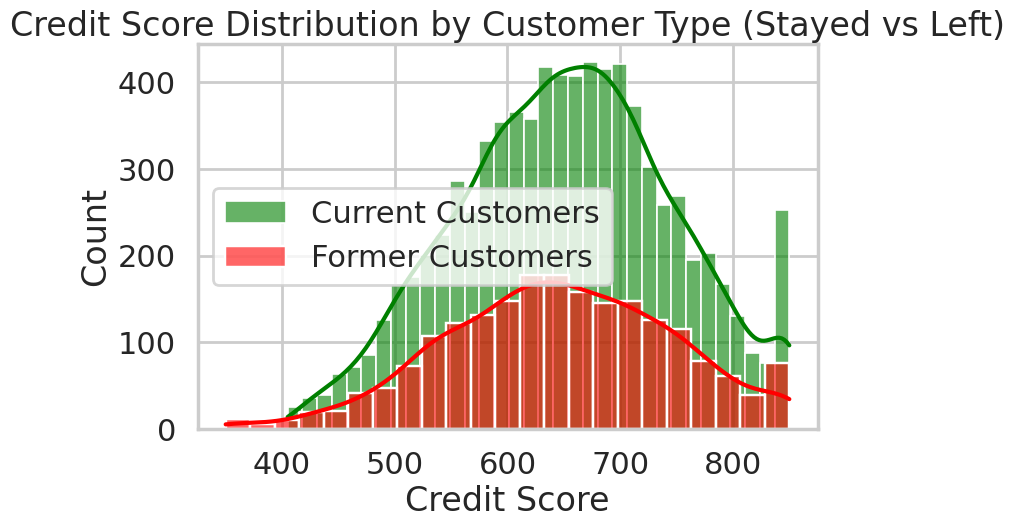

In [36]:
## TODO: Create histograms for the CreditScore distribution of both groups (Still with bank and Left the bank).

sns.histplot(data=df_0, x='CreditScore', kde=True, label='Current Customers', color='green', alpha=0.6)
sns.histplot(data=df_1, x='CreditScore', kde=True, label = 'Former Customers', color='red', alpha=0.6)

plt.title('Credit Score Distribution by Customer Type (Stayed vs Left)')
plt.xlabel('Credit Score')
plt.ylabel('Count')
plt.legend()
plt.show()

In [37]:
## TODO: Perform a t-test to compare the CreditScore between the two groups (Still with bank and Left the bank).

t_test, p_value = scipy.stats.ttest_ind(df_0['CreditScore'], df_1['CreditScore'])

print(f"The t-statistic is {t_test}.")
print(f"The p-value is {p_value}.")

The t-statistic is 2.7100778888729833.
The p-value is 0.006738213892192373.


### Conclusion
Do we reject the Null Hypothesis ? Why ?

###Yes because the p-value is much smaller than 0.05, which means there is a statistic difference in scores between those who stayed and those who left. Those who left may have had a worse score, maybe they left because of that.

## Hypothesis 3: Balance

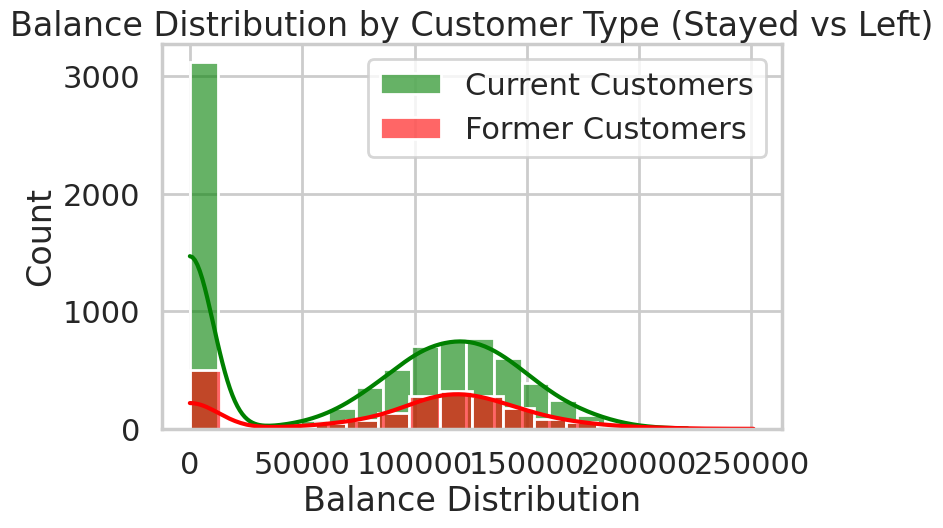

In [38]:
## TODO: Plot the distribution of Balance for both groups (Still with bank and Left the bank).

sns.histplot(data=df_0, x='Balance', kde=True, label='Current Customers', color='green', alpha=0.6)
sns.histplot(data=df_1, x='Balance', kde=True, label = 'Former Customers', color='red', alpha=0.6)

plt.title('Balance Distribution by Customer Type (Stayed vs Left)')
plt.xlabel('Balance Distribution')
plt.ylabel('Count')
plt.legend()
plt.show()

In [39]:
## TODO: Perform a t-test to compare the Balance between customers who stayed with the bank and those who left.

t_test, p_value = scipy.stats.ttest_ind(df_0['Balance'], df_1['Balance'])

print(f"The t-statistic is {t_test}.")
print(f"The p-value is {p_value}.")

The t-statistic is -11.936240300013841.
The p-value is 1.2755633191525477e-32.


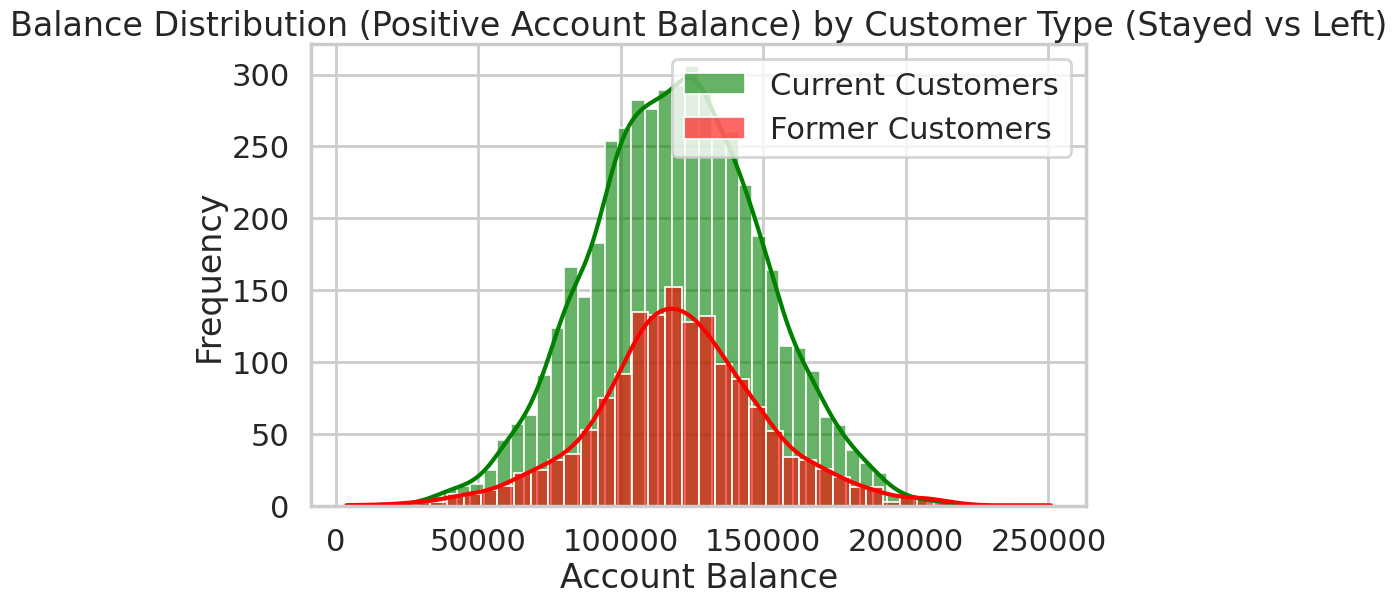

In [40]:
## TODO: Visualize the distribution of Balance for customers who stayed with the bank and those who left, excluding zero balances.

df_0_positive_balance = df_0[df_0['Balance'] > 0]
df_1_positive_balance = df_1[df_1['Balance'] > 0]

plt.figure(figsize=(10,6))

sns.histplot(data=df_0_positive_balance, x='Balance', kde=True, label='Current Customers', color='green', alpha=0.6)
sns.histplot(data=df_1_positive_balance, x='Balance', kde=True, label = 'Former Customers', color='red', alpha=0.6)

plt.title('Balance Distribution (Positive Account Balance) by Customer Type (Stayed vs Left)')
plt.xlabel('Account Balance')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [41]:
## TODO: Perform a t-test to compare the Balance between customers who stayed with the bank and those who left, excluding zero balances.

t_test, p_value = scipy.stats.ttest_ind(df_0_positive_balance['Balance'], df_1_positive_balance['Balance'])

print(f"The t-statistic is {t_test}.")
print(f"The p-value is {p_value}.")

The t-statistic is -1.374781881782122.
The p-value is 0.16924734893322796.


## Conclusion

Do we reject the Null Hypothesis ? Why ?
###The p-value is more than 0.05, whicih means we cannot reject it. No significant difference betwen those who stayed and left (excluding 0 balance).

## Hypothesis 4: Estimated Salary

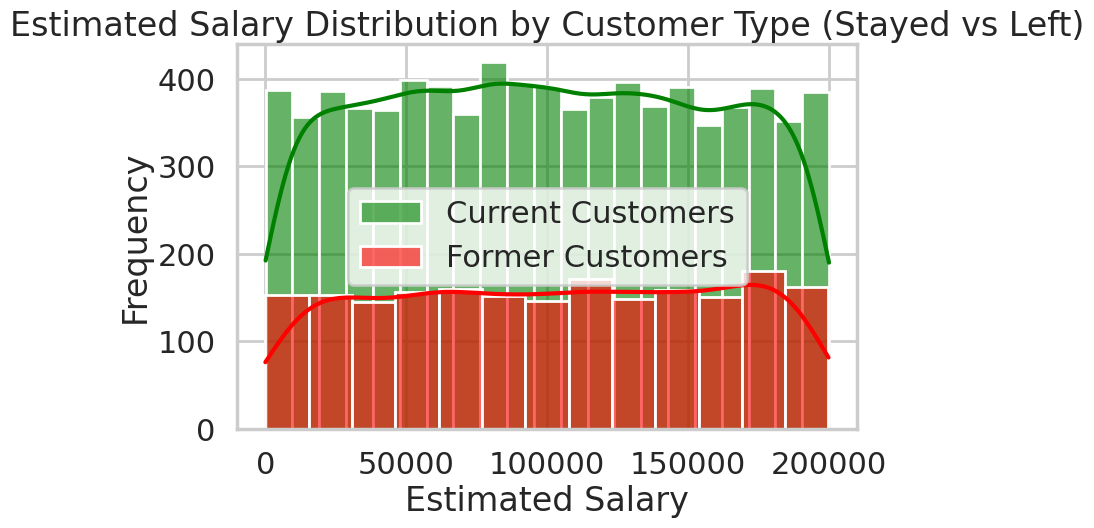

In [42]:
## TODO: Plot the distribution of EstimatedSalary for customers who stayed with the bank and those who left.

sns.histplot(data=df_0, x='EstimatedSalary', kde=True, label='Current Customers', color='green', alpha=0.6)
sns.histplot(data=df_1, x='EstimatedSalary', kde=True, label = 'Former Customers', color='red', alpha=0.6)

plt.title('Estimated Salary Distribution by Customer Type (Stayed vs Left)')
plt.xlabel('Estimated Salary')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [43]:
## TODO: Perform a t-test to compare the EstimatedSalary between customers who stayed and those who left.

t_test, p_value = scipy.stats.ttest_ind(df_0['EstimatedSalary'], df_1['EstimatedSalary'])

print(f"The t-statistic is {t_test}.")
print(f"The p-value is {p_value}.")

The t-statistic is -1.209653638019264.
The p-value is 0.22644042802223352.


### Using Bootstrapping

In [44]:
## TODO: Calculate the difference in means and shift the EstimatedSalary for both groups.


diff_est_means = df_1['EstimatedSalary'].mean() - df_0['EstimatedSalary'].mean()

new_est_means = diff_est_means

print(f"The difference in means is {new_est_means}.")

general_est_means = df['EstimatedSalary'].mean()

mean_est_shift = df_0['EstimatedSalary'] - df_0['EstimatedSalary'].mean() + general_est_means

mean_est_shift1 = df_1['EstimatedSalary'] - df_1['EstimatedSalary'].mean() + general_est_means

print(f"For customers who stayed with the bank, the mean has shifted to {mean_est_shift}, while for those who left, the mean has shifted to {mean_est_shift1}.")

The difference in means is 1727.2857587371254.
For customers who stayed with the bank, the mean has shifted to 1       112894.428109
3        94178.478109
4        79435.948109
6        10414.648109
8        75292.348109
            ...      
9993     29531.368109
9994    168125.398109
9995     96622.488109
9996    102051.618109
9999     38542.628109
Name: EstimatedSalary, Length: 7963, dtype: float64, while for those who left, the mean has shifted to 0        99973.44235
2       112556.13235
5       148381.27235
7       117971.44235
16        3722.23235
            ...     
9981     52069.73235
9982    113770.96235
9991     68009.27235
9997     40710.14235
9998     91513.08235
Name: EstimatedSalary, Length: 2037, dtype: float64.


In [45]:
## TODO: Calculate the bootstrap sample means for both groups and their difference.

size = 5000 # of samples (supposedly a good number)

bs_est_0 = bs_choice(mean_est_shift, np.mean, size) #null hypothesis version for sample data

bs_est_1 = bs_choice(mean_est_shift1, np.mean, size) #alternative hypothesis

bs_est_diff = bs_est_1 - bs_est_0 #bootstramp differences

std_bs_est_diff = np.std(bs_est_diff)

print(f"The standard deviation difference for the boostrap sampling is {std_bs_est_diff}.")

The standard deviation difference for the boostrap sampling is 1432.3899277185628.


In [47]:
## TODO: Calculate the p-value based on the bootstrap distribution of the difference in means.

p_value_salary= np.mean(bs_est_diff >= diff_est_means)

print(f"The p-value based on bootstrap distribution for diff in means is {p_value_salary}.")

The p-value based on bootstrap distribution for diff in means is 0.1142.


### Conclusion
Do we reject the Null Hypothesis ? Why ?

We cannot reject it because its .1142 which is greater than 0.05. This means there's no statistically significant difference between the estimated salary of those who stayed and those who left. Not teh best predictor.

## Final Conclusion
What will be the most helpful feature in predicting churning?
I'd say balance, but when we removed the 0, it didn't. So i guess age.